#### Node Clustering in Graphs Using the Kamei-Cock Algorithm
Application of the algorithm Kamei & Cock [1] (pseudocode from [2]) to a toy graph of 6 nodes.

The algorithm for graph works with graphs and bipartite graphs.

_References:_

[1] _H. Kamei, P. J. A. Cock, ["Computational of balanced relations and their lattice for a coupled cell network"](https://arxiv.org/abs/1211.6334). SIAM J. Appl. Dyn. Syst. 12, 352–382 (2013)_

[2] _Morone, Flaviano, Ian Leifer, and Hernán A. Makse. ["Fibration symmetries uncover the building blocks of biological networks."](https://www.pnas.org/doi/abs/10.1073/pnas.1914628117) Proceedings of the National Academy of Sciences 117.15 (2020): 8306-8314._

In [ ]:
import sys
sys.path.insert(0, '../Utilities')

import matplotlib.pyplot as plt

import networkx as nx
from networkx.algorithms import bipartite

from utilities_fibration import *

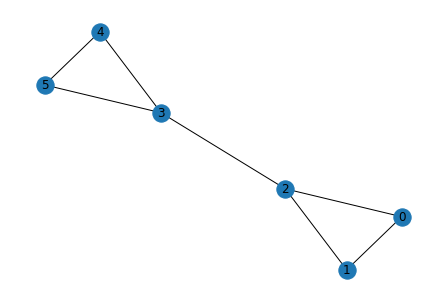

In [2]:
# Graph creation and visualization

G = nx.Graph()
G.add_edges_from([
    (0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (4, 5), (5, 3)
])

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True)


Final coloring: {0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0}


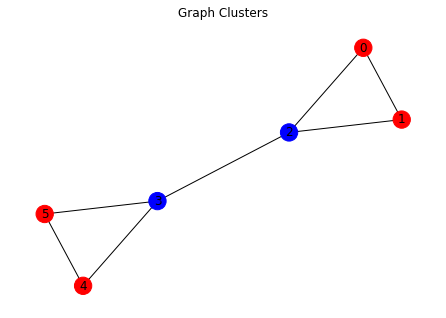

In [3]:
# No need to define the inital type. For graph we can apply directly the algorithm

result = kameicock_coloring(G, {})#, initial_types)
print("Final coloring:", result)

pos = nx.spring_layout(G)
# Cluster colors
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']

nx.draw(G, pos, node_color=[colors[result[node] % len(colors)] for node in G.nodes()], with_labels=True)
plt.title("Graph Clusters")
plt.show()

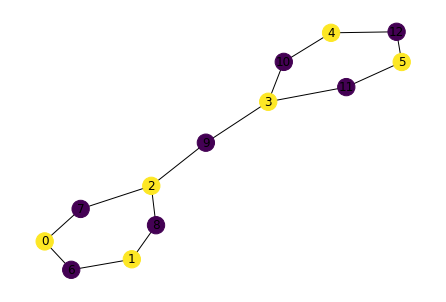

In [4]:
# We create and visualize a bipartite graph starting from the original network

G_bip = graph_to_bipartite(G)

pos = nx.spring_layout(G_bip)

color_dict = bipartite.color(G_bip)
cols = [color_dict[node] for node in G_bip.nodes()]
nx.draw(G_bip, pos, node_color = cols, with_labels=True)

Final coloring: {0: 1, 1: 1, 2: 3, 3: 3, 4: 1, 5: 1, 6: 2, 7: 0, 8: 0, 9: 4, 10: 0, 11: 0, 12: 2}


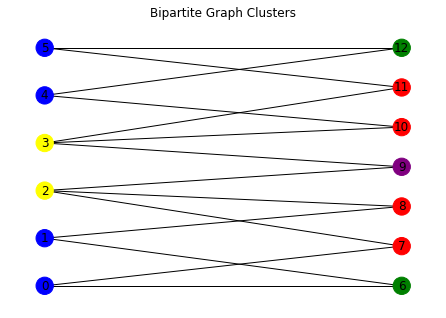

In [5]:
# Application of the algorithm to the bipartite graph associated to the original graph

result = kameicock_coloring(G_bip, color_dict)
print("Final coloring:", result)
# Visualize the result

pos = pos = nx.bipartite_layout(G_bip, nodes=[n for n, d in G_bip.nodes(data=True) if d['bipartite'] == 0])
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
nx.draw(G_bip, pos, node_color=[colors[result[node] % len(colors)] for node in G_bip.nodes()], with_labels=True)

plt.title("Bipartite Graph Clusters")
plt.show()